
# **Linear Kalman filter Recap**

* Consider the following linear system, where $\mathbf{x}$ denotes the state vector, $\mathbf{y}$ denotes the measurement vector, $\mathbf{u}$ denotes the system input, $\mathbf{w}$ denotes the input process noise with $E(\mathbf{ww}^T)=Q_{w}$, and $\boldsymbol{\nu}$ denotes the measurement noise with $E(\boldsymbol{\nu \nu}^T)=R_{\nu}$. Matrices $A$, $B$, $G_w$, $G_{\nu}$,and $C$ denote the state, input, process noise, and output matrices respectively.
  \begin{equation}
 \begin{array}{l l}
\dot{\mathbf{x}} &=A\mathbf{x}+ B\mathbf{u}+G_w\mathbf{w}\\
\mathbf{y}         &=C\mathbf{x}+G_{\nu}\boldsymbol{\nu}
\end{array}
\end{equation}
*  A linear observer for this system can be defined as follows, where $\mathbf{\hat{x}}$ denotes the estimated state, $\mathbf{\hat{y}}$ denotes the estimated measurement, and $K$ denotes the observer gain matrix.
 \begin{equation}
 \begin{array}{l l}
\dot{\hat{\mathbf{x}}} &=A\mathbf{\hat{x}}+ B\mathbf{u}+K(\mathbf{y}-C\mathbf{\hat{x}})
\end{array}
\end{equation}

* Defining a linear error state $\mathbf{\delta x} =\mathbf{x} -\mathbf{\hat{ x}} $ followed by differentiation yields the following error state system.

 \begin{equation}
 \begin{array}{l l}
\dot{\mathbf{\delta x}} &=(A - KC)\mathbf{\delta x}+ G_w\mathbf{w} - KG_{\nu}\boldsymbol{\nu}
\end{array}
\end{equation}

* In deterministic filter formulations the observer gain $K$ is designed to stabilize the noiseless ($\mathbf{w}=\mathbf{0},\boldsymbol{\nu}=\mathbf{0}$) error state system  using a pole placement approach, i.e., find $K$ such that (A - KC) has Eigen values with negative real parts.

* Kalman algorithm provides an optimal gain $K$ taking in to consideration the noise statistics that affect the system.

 \begin{equation}
 \begin{array}{l l}
K=PC^TR_{\nu}^{-1}\\
            \dot{P}=AP+PA^T+CQ_{w}C^T-PC^TR_{\nu}^{-1}CP
\end{array}
\end{equation}

* It can be shown that the above formulation of $K$ is optimal and globaly stabilizes the linear gaussian error state system presented.

* For digital implementation, a discrete form of the above filter is preferred. The process is completed in two steps termed  prediction and correction. The prediction step propagates the state mean  $ \hat{\mathbf{x}}$ and covariance $P$ of the state considering the input information.
 \begin{equation}
 \begin{array}{l l}
  \hat{\mathbf{x}}_{k+1|k}
                =
           A_k \hat{\mathbf{x}}_k + B_k\mathbf{u}_k\\
           P=A_k PA_k ^T +G_{w,k}Q_wG_{w,k}^T\\
\end{array}
\end{equation}

* Here $Ak$ denotes the state transition matrix, $Bk$ denotes the discrete time equivalent input matrix, and $T$ denotes the sampling time. The discrete time process noise matrix $G_k$ is used for covariance prediction. The following simplifications apply when matrices $A,B,G_w$ and input $\mathbf{u}$ are assumed to be constant between samples.
 \begin{equation}
 \begin{array}{l l}
           \displaystyle A_k = e^{AT} \approx I+AT+\frac{1}{2}A^2T^2  \\
          \displaystyle  B_k  \approx BT + \frac{1}{2}ABT^2 \\
          \displaystyle  G_{w,k}  \approx G_wT + \frac{1}{2}AG_wT^2 \\           
\end{array}
\end{equation}

* The correction step incorporates the new information gathered using the measurements $\mathbf{y}$. Note that $R_{\nu}$ in the following formulation.
 \begin{equation}
 \begin{array}{l l}
  K=PC^T(CPC^T+R_{\nu})^{-1}\\
           \hat{\mathbf{x}}_{k+1}=\hat{\mathbf{x}}_{k+1|k}+ K (\mathbf{y}_{k+1}-C\mathbf{\hat{x}}_{k+1|k})\\
            P=(I-KC)P
\end{array}
\end{equation}

* The above formulation is convenient to execute as the measurements can be processed as an when they are captured \cite{McGee85}. Next we look at how to approach a nonlinear problem using this filter.

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1BUx_W0hXcG5i-E2gO7rMYZHDNbEsNLCi"
    width="500"/>
</div>
</center>



# **Extended Kalman Filter (Linearized)**
Consider a nonlinear system:
 
 \begin{equation}
 \begin{array}{l l}
 \dot{\mathbf{x}}
                &=
           f(\mathbf{x},\mathbf{u},\mathbf{w})\\  
             \mathbf{y}
                &=
             h(\mathbf{x},\boldsymbol{\nu})  
             \end{array}
\end{equation}

An observer for this system can be defined as follows:
 \begin{equation}
 \begin{array}{l}
            \dot{\hat{\mathbf{x}}}
                =
           f(\hat{\mathbf{x}},\mathbf{u})
             +
            K (\mathbf{y}-\mathbf{\hat{y}})\\
\end{array}
\end{equation}

Defining a linear error state $\mathbf{\tilde {x}} =\mathbf{x} -\mathbf{\hat{ x}} $ followed by differentiation yields the following error state dynamics:


 \begin{equation}
 \begin{array}{l l}
\dot{\tilde {\mathbf{x}}} &= f(\mathbf{x},\mathbf{u},\mathbf{w})-f(\hat{\mathbf{x}},\mathbf{u})
             -
            K (h(\mathbf{x},\boldsymbol{\nu})-h(\mathbf{\hat{x}}))\\
            \end{array}
\end{equation}

Taylor series approximation about the current best estimate ($\mathbf{x}=\mathbf{\hat{x}},\mathbf{w}=\mathbf{0},\mathbf{\nu}=\mathbf{0}$) results in a linearized error state system.

 \begin{equation}
 \begin{array}{l l}
            \dot{\mathbf{\delta x}}=& \displaystyle \cancel{f(\hat{\mathbf{x}},\mathbf{u}) }+\frac{\partial  f(\mathbf{x},\mathbf{u},\mathbf{w})}{\partial \mathbf{x}}\Bigr|_{\substack{\mathbf{x}=\hat{\mathbf{x}}\\\mathbf{w}=0}}\mathbf{\delta x} +\frac{\partial  f(\mathbf{x},\mathbf{u},\mathbf{w})}{\partial \mathbf{w}}\Bigr|_{\substack{\mathbf{x}=\hat{\mathbf{x}}\\\mathbf{w}=0}} \mathbf{w} - \cancel{f(\hat{\mathbf{x}},\mathbf{u})}\\
             &\displaystyle ~ -
            K \left(\cancel{h(\mathbf{\hat{x}})}+\frac{\partial h(\mathbf{x},\boldsymbol{\nu})}{\partial \mathbf{x}}\Bigr|_{\substack{\mathbf{x}=\hat{\mathbf{x}}\\\mathbf{\nu}=0}}\mathbf{\delta x}
            +\frac{\partial h(\mathbf{x},\boldsymbol{\nu})}{\partial \boldsymbol{\nu}}\Bigr|_{\substack{\mathbf{x}=\hat{\mathbf{x}}\\\mathbf{\nu}=0}}\boldsymbol{\nu}-\cancel{h(\mathbf{\hat{x}}})\right)\\
            \dot{\mathbf{\delta x}} &=A \mathbf{\delta x}+ G_{w}\mathbf{w} - K(C\mathbf{\delta x}-G_{\nu}\boldsymbol{\nu})
\end{array}
\end{equation}


 \begin{equation}
 \begin{array}{l l}
\dot{\mathbf{\delta x}} &=(A - KC)\mathbf{\delta x}+ G_{w}\mathbf{w} - KG_{\nu}\boldsymbol{\nu}
\end{array}
\end{equation}

A Kalman algorithm can be applied to stabilize the above linearized error state system similar to the previous linear formulation to stabilize the error state dynamics. Using a discrete formulation the resulting linearized EKF algorithm takes the following form:

<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=17v6j4REtPm0LU-lFXhoj6btb8SPRTr16"
    width="500"/>
</div>
</center>


# Example 1: EKF for 2D robot odometry localization

Figure below illustrates a mobile robot traversing on a 2D plane with its body frame denoted as $\{B\}$ and its inertial frame denoted as $\{I\}$. The robots state is defined by its posistion along x axis $p_x$, along y axis $p_y$ and its planar orientation $\theta$. The robot has its velocity along the body fixed forward direction $v$ and its angular velocity $\omega$ as inputs.  The inputs are measured using noisy sensors with $\eta_\omega\sim \mathcal{N}(\mathbf{0}, 0.1^2)$ and $\eta_v\sim \mathcal{N}(\mathbf{0}, 0.1^2)$

\begin{equation*}
v_m = v+\boldsymbol{\eta}_v \\
\mathbf{\omega}_m = \mathbf{\omega}+\boldsymbol{\eta}_{\omega}
\end{equation*}
A position sensor measurement $\mathbf{y}_p$ provides the position of the object $\mathbf{p}$ corrupted by a noise term $\boldsymbol{\eta}_p \sim \mathcal{N}(\mathbf{0}, diag(0.1^2,~0.1^2))$.
 \begin{equation*}
\mathbf{y}_p = \mathbf{p}+\boldsymbol{\eta}_p
\end{equation*}


<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1QT4YzdXV3V0TKiHM5qxI1gY91vyq9S_y"
    width="350"/>
</div>
</center>

1. Generate the nonlinear state space model for this system in the following form.
 \begin{equation*}
 \begin{array}{l l}
\dot{\mathbf{x}} &=\mathbf{f}(\mathbf{x},\mathbf{u},\mathbf{w})\\
\mathbf{y}         &=\mathbf{h(x,\boldsymbol{\nu})}
\end{array}
\end{equation*}


2. Generate the linearized error state system equations of the Kalman observer in the following form. Also generate the process and measurement covariance matrices $\mathbf{Q}$ and $\mathbf{R}$.

 \begin{equation*}
 \begin{array}{l l}
\dot{\mathbf{\delta x}} &=(\mathbf{A} - \mathbf{KC})\mathbf{\delta x}+ \mathbf{G}\mathbf{w}\\
\mathbf{\delta y}         &=\mathbf{C \delta x} + \mathbf{G}_{\nu}\boldsymbol{\nu}
\end{array}
\end{equation*}

3. Write the Predict function for implementing the Kalman filter which takes the state $\hat{x}$, covariance $P$, control input $u$, and paramters $param$ as the arguments of the function and returns the next state and the covariance

In [1]:
# Write the predict function
def predict_2Dbot(x_est,P_est,u,param):
  v = u[0]; omega =u[1]
  px = x_est[0]; py = x_est[1]; theta = x_est[2]
  dt = param['dt']; QN = param['QN']

  # mean prediction -> do sys_model
  #x_est = sys_model_2Dbot(x_est,u,np.zeros(QN.shape[0]),param)

  dp = np.array([v*np.cos(theta),v*np.sin(theta)])
  dtheta = omega
  dx = np.block([dp,dtheta])
  x_est = x_est + dx*dt
  x_est[2] = wrapToPi(x_est[2])

  # Covariance prediction -> closed form hand computeddo auto diff

  A = np.array([[0., 0., -v*np.sin(theta)],
                [0., 0.,  v*np.cos(theta)],
                [0., 0.,  0.]])

  Gw = np.array([[np.cos(theta), 0.],
                 [np.sin(theta), 0.],
                 [           0., 1.]])

  Ak = np.eye(A.shape[0]) + A*dt + 0.5*dt**2*A@A
  Gk = Gw*dt + 0.5*dt**2*A@Gw

  P_est = Ak @ P_est @ Ak.T + Gk @ QN @ Gk.T


  return x_est, P_est  # returns a tuple

4. Write the Correct function for implementing the Kalman filter which takes the state $\hat{x}$, covariance $P$, measurement $y$, and paramters $param$ as the arguments of the function and returns the next state and the covariance. Optionaly an outlier rejection scheme can be implemented for the correction step.

In [2]:
# Write the correct function
#from scipy.stats.distributions import chi2
chi2inv95 = {
    1: 3.8415,
    2: 5.9915,
    3: 7.8147,
    4: 9.4877,
    5: 11.070,
    6: 12.592,
    7: 14.067,
    8: 15.507,
    9: 16.919}

def correct_2Dbot(x_est,P_est,y,param):
  RN = param['RN'];

  Ck = np.array([[1., 0., 0.],
                 [0., 1., 0.]])

  Gv = np.eye(2)

  y_est = Ck @ x_est

  Sk = Ck @ P_est @ Ck.T + RN
  inn = y - y_est
  d2 = inn@Sk.inverse()@inn.T
  if d2< chi2inv95[y_est.shape[0]]:#OR chi2.ppf(0.95, df=y_est.shape[0]):
    Ko = P_est @ Ck.T @ np.linalg.inv(Sk)
    P_est = (np.eye(Ck.shape[1]) - Ko @ Ck) @ P_est
    x_est = x_est + Ko @ (y - y_est)

  return x_est, P_est, y_est, Sk   # returns a tuple

5. Run the following code and comment on the accuracy of the estimation, and weather the filter is providing a consistent estimate.

In [3]:
#@title Monte carlo runs of the 2D Robot
# 2D robot simulation
# minimal code example
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import matplotlib.animation as animation
from matplotlib import rc
import matplotlib as mpl
import matplotlib.transforms as transforms

rc('animation', html='jshtml')


from time import sleep
from numpy import random
from decimal import Decimal # to make modulo work





def wrapToPi(x):
    xwrap = np.remainder(x, 2 * np.pi)
    mask = np.abs(xwrap) > np.pi
    if len(x.shape) is not 1 :
      if mask :
        xwrap -= 2 * np.pi * np.sign(xwrap)
      else :
        xwrap = x
    else :
      xwrap[mask] -= 2 * np.pi * np.sign(xwrap[mask])
    #mask1 = x < 0
    #mask2 = np.remainder(x, np.pi) == 0
    #mask3 = np.remainder(x, 2 * np.pi) != 0
    #xwrap[mask1 & mask2 & mask3] -= 2 * np.pi
    return xwrap


def animate_2Dbot(X,U,T,param,robot_scale,frame_num,speedup):
  robot_scale =0.5;
  dt=param[0]
  fig = plt.figure()
  ax = fig.add_subplot(aspect='equal')
  ax.set_xlim(-2.2, 2.2)
  ax.set_ylim(-2.2, 2.2)
  triangle = ax.add_patch(plt.Polygon(np.array([[-0.4,0.3],[-0.4,-0.3],[0.4,-0.01],[1.2,0],[0.4,0.01]])*robot_scale, True))
  line, = ax.plot([0, 0,3], [0, -1,5], lw=1, c='c', alpha=0.5) # draw a line
  line.set_data([0],[0])
  transform = mpl.transforms.Affine2D().rotate_deg(-45) + mpl.transforms.Affine2D().translate(-5,-5)
  triangle.set_transform(transform+ax.transData)

  # determine skip amount from number of frames
  #frame_num =300
  #speedup =2
  tail = 15
  skip = np.floor(len(X)/frame_num)
  if skip < 1:
    skip=1
    frame_num = len(X)
  skip=int(skip)

  def animate(i):
    #print(i)
    transform = mpl.transforms.Affine2D().rotate(X[skip*i][2]) + mpl.transforms.Affine2D().translate(X[skip*i][0],X[skip*i][1])
    triangle.set_transform(transform+ax.transData)
    if i>1:
      if i>tail:
        Xtemp= np.array(X[i-tail:i])
        line.set_data(Xtemp[:,0],Xtemp[:,1])
      else:
        Xtemp= np.array(X[0:i])
        line.set_data(Xtemp[:,0],Xtemp[:,1])

  ani = animation.FuncAnimation(fig, animate, frames=frame_num, repeat=True, interval=int(dt*1000*skip/speedup)) # interval determines speed in ms
  print("Number of frames :",frame_num)
  plt.close()
  return ani

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)
# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)
mc_runs =22 #@param {type:"slider", min:1, max:50, step:1}

NEES = []; RMSE = [];
for mc in range(mc_runs):
  # 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
  dt = 0.1
  p0= np.array([0.,-1.])
  theta0= 0.0 # Initial angular displacement (rad) in quaternion
  t_end = 12.6; # 2 times period
  sig_n_x=0.1; sig_n_y=0.1;
  sig_n_v=0.1; sig_n_omg=0.1;
  X = []; T= []; U =[]; Y=[]; E=[]; X_est=[];P_est=[];S_est=[];Y_est=[];# Variables for data acquisition

  # these vectors are needed to define a system model
  x = np.block([p0,theta0]) # state vector - variables
  x_est = np.array([0.,-1.,0.]) # state vector - variables
  y = np.array([0,.0,])
  Pk = np.eye(x_est.shape[0])
  QN =np.diag([sig_n_v**2, sig_n_omg**2]);
  RN =np.diag([sig_n_x**2, sig_n_y**2]);
  param = {}  #we keep all parameters in a dictionary for ease of access
  param['dt']= dt  # the parameter vector - constants
  param['QN']= QN; param['RN']= RN;

  #2 . simulation -
  for t in np.arange(0,t_end,dt):
    u = np.array([1,1])

    # TODO by STUDNET: READ CURRENT STATE X
    p = x[0:2]; theta = x[2]
    v=u[0]; omega=u[1]

    # TODO by STUDNET: INTEGRATE TO FIND NEXT X
    #x = sys_model_2Dbot(x,u,np.zeros(QN.shape[0]),param)
    dp = np.array([v*np.cos(theta),v*np.sin(theta)])
    dtheta = omega
    dx = np.block([dp,dtheta])
    x = x + dx*dt
    x[2] = wrapToPi(x[2])

    # Measurement Simulation
    p = x[0:2]; theta = x[2]
    u = u + np.sqrt(QN) @ np.random.randn(QN.shape[0])
    y = p + np.sqrt(RN) @ np.random.randn(RN.shape[0])

    # Kalman prediction
    x_est, Pk = predict_2Dbot(x_est,Pk,u,param)

    # Kalman Correction
    if (Decimal(str(t)) % Decimal(str(0.3)))<Decimal(dt*0.01)  : # update rate
          x_est, Pk, y_est, Sk = correct_2Dbot(x_est,Pk,y,param)

    e = x - x_est
    e[2] = wrapToPi(e[2])

    #Data Aquisition
    X.append(x)
    X_est.append(x_est)
    T.append(t)
    Y.append(y)
    Y_est.append(y_est)
    U.append(u)
    E.append(e)
    P_est.append(Pk)
    S_est.append(Sk)
    NEES.append(1/e.shape[0]*e.T @ np.linalg.inv(Pk) @ e)
    RMSE.append(np.linalg.norm(e))

  # List to array conversion
  P_est = np.array(P_est)
  X_est = np.array(X_est)
  X = np.array(X)
  Y = np.array(Y)
  E = X - X_est
  S_est = np.array(S_est)
  Y_est = np.array(Y_est)

  if mc == 0:
      print('run: ',mc, end ='.')
  else:
      print(mc, end ='.')


#storing for monte carlo
NEES = np.array(NEES)
NEES=NEES.reshape(mc+1,int(NEES.shape[0]/(mc+1)))
avgNEES = NEES.mean(0)

RMSE = np.array(RMSE)
RMSE=RMSE.reshape(mc+1,int(RMSE.shape[0]/(mc+1)))
avgRMSE = RMSE.mean(0)

print('NEES : ', avgNEES.mean(0))


print('RMSE : ', avgRMSE.mean(0))

# 4. visualization functions
fig1 = plt.figure()
p = plt.plot(T, X)

fig, axs = plt.subplots(X.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(X.shape[1]):
  #axs[i].plot(T,X_est[:,i]+2*np.sqrt(P_est[:,i,i]),'b')
  axs[i].plot(T,X[:,i],color='black')
  axs[i].plot(T,X_est[:,i],'b--')
  #axs[i].plot(T,X_est[:,i]-2*np.sqrt(P_est[:,i,i]),color='blue')
  if i==0:
    axs[i].set_title('Estimated state and actual state x_'+ str(1+i) + ',x_est'+ str(1+i))
  else:
    axs[i].set_title('x_'+ str(1+i) + ',x_est'+ str(1+i))
  axs[i].fill_between(T, X_est[:,i]-2*np.sqrt(P_est[:,i,i]),X_est[:,i]+2*np.sqrt(P_est[:,i,i]) ,
    alpha=0.9, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, X_est[:,i]-3*np.sqrt(P_est[:,i,i]),X_est[:,i]+3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=2)

print('Estimated error state vs Time')
fig, axs = plt.subplots(E.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(E.shape[1]):
  #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].plot(T,E[:,i],color='black')
  #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].fill_between(T, -2*np.sqrt(P_est[:,i,i]),2*np.sqrt(P_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, -3*np.sqrt(P_est[:,i,i]),3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
  if i==0:
    axs[i].set_title('State error vs Time : x_'+ str(1+i) + '-x_est'+ str(1+i))
  else:
    axs[i].set_title('x_'+ str(1+i) + '-x_est'+ str(1+i))


fig, axs = plt.subplots(Y.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(Y.shape[1]):
  if Y.shape[1] == 1:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs.fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    axs.set_title('Innovation vs Time:y_'+ str(1+i) + '-y_est'+ str(1+i))
  else:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs[i].fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    if i==0:
      axs[i].set_title('Innovation vs Time: y_'+ str(1+i) + '-y_est'+ str(1+i))
    else:
      axs[i].set_title('y_'+ str(1+i) + '-y_est'+ str(1+i))


fig1 = plt.figure()
p = plt.plot(T, avgNEES);
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average NEES')
plt.title('Average NEES vs Time');

fig1 = plt.figure()
p = plt.plot(T, avgRMSE)
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average RMSE');
plt.title('Average RMSE vs Time');



# TODO by STUDNET: Plot the trajectory of the robot (p_x vs p_y)


#anim = animate_2Dbot(X,U,T,param,0.5,300,4) # this is a custom visualization
#anim

<>:26: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:26: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/cp/7kr1ml951n3fk_kdmlj2xn_r0000gn/T/ipykernel_2407/2839014190.py:26: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(x.shape) is not 1 :


AttributeError: 'numpy.ndarray' object has no attribute 'inverse'

# Exercise 1 -  2D INS

Consider a robot with a body fixed frame $\{B\}$ moving on a 2D plane. The vector $\mathbf{p}=[p_x ~p_y]^T$ denotes the position of the robot relative to a fixed navigation frame $\{W\}$, $v$ denotes the 2D linear velocity of the robot relative to a fixed navigation frame $\{W\}$, $a$  denotes the acceleration along body fixed $x,y$  direction of the robot. An accelerometer attached to the body provides a measurement $f_a$ which measures the acceleration $a$, with a bias of $b_a$ and has a random noise of $\eta_a \sim \mathcal{N}(0, diag(0.01^2,0.01^2))$. Accelerometer bias is modelled as a random walk process as shown below with random noise $\eta_{ba} \sim \mathcal{N}(0, (0.001^2,0.001^2))$.
\begin{equation*}
\begin{array}{l l}
f_a &= a+b_a+\eta_a\\
\dot{b}_a &=0+\eta_{ba}
\end{array}
\end{equation*}
A gyroscope attached to the robot provides a measurement $\omega_m$  which measures the angular velocity $\omega$ along the body fixed z axis of the robot, with a bias of $b_{\omega}$ and has a random noise of $\eta_a \sim \mathcal{N}(0, 0.001)$. Gyroscope bias is modelled as a random walk process (given below) with random noise $\eta_{b\omega} \sim \mathcal{N}(0, 0.001)$.
\begin{equation*}
\begin{array}{l l}
\omega_m &= \omega+b_{\omega}+\eta_{\omega}\\
\dot{b}_{\omega}&=0+\eta_{\omega b}
\end{array}
\end{equation*}
 A position sensor measurement $\mathbf{y}_p$ provides the position of the object $\mathbf{p}$ corrupted by a noise term $\boldsymbol{\eta}_p \sim \mathcal{N}(\mathbf{0}, diag(0.004^2,~0.004^2))$.
 \begin{equation*}
\mathbf{y}_p = \mathbf{p}+\boldsymbol{\eta}_p
\end{equation*}



1. Generate the nonlinear state space model for this system in the following form.
 \begin{equation*}
 \begin{array}{l l}
\dot{\mathbf{x}} &=\mathbf{f}(\mathbf{x},\mathbf{u},\mathbf{w})\\
\mathbf{y}         &=\mathbf{h(x,\boldsymbol{\nu})}
\end{array}
\end{equation*}
Consider the accelerometer measurement and gyroscope measurement as inputs ($\mathbf{u}=[f_{ax}~f_{ay}~\omega_m]^T$ ), the position sensor as an output ($\mathbf{y}=\mathbf{y}_p$) and select the state vector as $\mathbf{x}=[x~ y~v_x~v_y ~\theta~b_{a} ~b_{\omega}]^T$.

2. Generate the linearized error state system equations of the Kalman observer in the following form. Also generate the process and measurement covariance matrices $\mathbf{Q}$ and $\mathbf{R}$.

 \begin{equation*}
 \begin{array}{l l}
\dot{\mathbf{\delta x}} &=\mathbf{A}\mathbf{\delta x} - \mathbf{K}\mathbf{\delta y}+ \mathbf{G_w}\mathbf{w}\\
\mathbf{\delta y}         &=\mathbf{C \delta x} + G_{\nu}\boldsymbol{\nu}
\end{array}
\end{equation*}

3. Comment on the observability of the error state.

# Automatic Differentiation

* In the above formulation the Jacobian computations can be quite error prone when performing by hand. This can be minimized using one of the following methods:

> **Symbolic Differentiation** : Using packages like python`s sympy or Matlab symbolic toolbox, one can find the closed form expressions for the required Jacobians. And these expressions can be hardcoded within a function so the value of the expression can be evaluated when needed. This tends to provide the best result but it should be written using correct parameters so the symbolic toolbox can handle the complexity of the dynamic equations. This soon becomes intractable when the dimentionality increases.


> **Numeric Differentiation** :The approach uses finite differences to numericaly compute the jacobian. However this process is the slowest and the resolution at which a jacobian is calculated can lead to the wrong result.

> **Automatic Differentiation** :This is a recent development in support of primarily machine learning applications. In this method the functions that make up the system model is written using a data type (dual numbers) which allows an automatic differention library to keep track of all the fundamental mathematic steps and perturbations (additions, multiplications,trignometric operations, logarithms, exponents etc.) that make up an expression. The library uses these with the chain rule to formulate the required differentiation of the final expression. This has both the advanages of being able to give closed form comparable results upto machine precision and being highly scalable even up to differentiating large neural networks which the libraries were designed for.











In [ ]:
%%capture
!pip install jaxlie
from jax import grad, jit, vmap, jacrev, jacfwd
import numpy as np
import jax.numpy as jnp
from functools import partial
from jaxlie import SO3
from numpy import pi

* We use Jax for automatic differentiation and performing it at a sufficient speed.

* For the purpose we create our system and measuremetn models as functions using Jax libraries jnp data type.

In [ ]:
def sys_model_2Dbot(x,u,w,param):
  v = u[0]; omega =u[1]
  nu_v = w[0]; nu_omega =w[1]
  px = x[0]; py = x[1]; theta = x[2]
  dt = param['dt'];

  v = v+nu_v; omega = omega+nu_omega

  dp = jnp.array([v*jnp.cos(theta),v*jnp.sin(theta)])
  dtheta = omega
  dx = jnp.block([dp,dtheta])
  x = x + dx*dt

  #bound yaw - this method works better fro wrapping
  Rot = SO3.from_rpy_radians(0.,0.,x[2])
  x = x.at[2].set(Rot.compute_yaw_radians())
  return x

In [ ]:
w =np.zeros(2)
x_est = np.array([0.,0.,np.pi/2*0])
u = np.array([2,.0,])
param={}
dt=0.1
param['dt']= dt  # the parameter vector - constants

jacfwd_2Dbot_jit = jit(jacfwd(sys_model_2Dbot,argnums=(0, 2))) #this makes a compiled function that can evalauate the jacobian
# with respect to the 0`th and 2`nd argument of the sys_model. i.e., x and noise

print('Autodiff and closed form comparison')
Ak, Gk= jacfwd_2Dbot_jit(x_est,u,w,param) # 16.7  --> 2.96 after jit -->12 us after jacfwd_jit

print('Ak',Ak)
print('Gk',Gk)

# Comparison
v = u[0]; omega =u[1]
px = x_est[0]; py = x_est[1]; theta = x_est[2]
A = np.array([[0., 0., -v*np.sin(theta)],[0., 0.,  v*np.cos(theta)],[0., 0.,  0.]])

Gw = np.array([[np.cos(theta), 0.],
                [np.sin(theta), 0.],
                [           0., 1.]])

Ak = np.eye(A.shape[0]) + A*dt + 0.5*dt**2*A@A
Gk = Gw*dt + 0.5*dt**2*A@Gw

print('Ak',Ak)
print('Gk',Gk)


Autodiff and closed form comparison
Ak [[1.  0.  0. ]
 [0.  1.  0.2]
 [0.  0.  1. ]]
Gk [[0.1 0. ]
 [0.  0. ]
 [0.  0.1]]
Ak [[1.  0.  0. ]
 [0.  1.  0.2]
 [0.  0.  1. ]]
Gk [[0.1  0.  ]
 [0.   0.01]
 [0.   0.1 ]]


# Implementing linearized EKF using autodiff

* Now using Autodiff we can implement the same EKF for 2D Robot odometry localization as follows:

In [ ]:
%%capture
!pip install jaxlie

In [ ]:
from jax import jacfwd, jacrev, jit
import numpy as np
import jax.numpy as jnp
from functools import partial
from jaxlie import SO3
from numpy import pi


#write the sys_model
def sys_model_2Dbot(x,u,w,param):
  # x_k+1 = f_k(x_k,u_k,w_k) format
  v = u[0]; omega =u[1]
  nu_v = w[0]; nu_omega =w[1]
  px = x[0]; py = x[1]; theta = x[2]
  dt = param['dt'];

  v = v+nu_v; omega = omega+nu_omega

  dp = jnp.array([v*jnp.cos(theta),v*jnp.sin(theta)])
  dtheta = omega
  dx = jnp.block([dp,dtheta])
  x = x + dx*dt

  #bound yaw
  Rot = SO3.from_rpy_radians(0.,0.,x[2])
  x = x.at[2].set(Rot.compute_yaw_radians())
  return x

#write the meas_model
def meas_model_2Dbot(x,nu,param):
  # y_k = g_k(x_k,nu_k) format
  nu_px = nu[0]; nu_py =nu[1]
  px = x[0]; py = x[1]; theta = x[2]
  dt = param['dt'];

  y = jnp.array([px, py]) + nu
  return y


#jit the functions - makes running faster ~1000x
sys_model_2Dbot_jit = jit(sys_model_2Dbot)
meas_model_2Dbot_jit = jit(meas_model_2Dbot)

#jit the autodiff jacobian calls - makes calling faster ~1000x
jacfwd_sys_2Dbot_jit = jit(jacfwd(sys_model_2Dbot,argnums=(0, 2)))
jacfwd_meas_2Dbot_jit = jit(jacfwd(meas_model_2Dbot,argnums=(0, 1)))

* The implementation of prediction and correction functions are now generic. i.e., takes the sys_model, meas_model functions as inputs so is general to any model that has a linear error state*

In [ ]:
#Write the predict function - These functions are general
def predict_ekf_autodiff(x_est,P_est,u,param,sys_func,Jsys_func):
  dt = param['dt']; QN = param['QN']

  # mean prediction -> do sys_model
  w =jnp.zeros(QN.shape[0]) #noise less
  x_est = sys_func(x_est,u,w,param)

  # Covariance correction
  Ak, Gk= Jsys_func(x_est,u,w,param)
  P_est = Ak @ P_est @ Ak.T + Gk @ QN @ Gk.T

  return x_est, P_est  # returns a tuple


In [ ]:
chi2inv95 = {1: 3.8415, 2: 5.9915, 3: 7.8147, 4: 9.4877, 5: 11.070, 6: 12.592,
    7: 14.067, 8: 15.507, 9: 16.919}

def correct_ekf_autodiff(x_est,P_est,y,param,meas_func,measJ_func):
  RN = param['RN'];

  # innovation calculation
  nu =jnp.zeros(RN.shape[0]) #noise less
  y_est = meas_func(x_est,nu,param)
  inn = y- y_est

  # Innovation covariance
  Ck, Gv= measJ_func(x_est,nu,param)
  Sk = Ck @ P_est @ Ck.T + RN

  # Mean and Covariance correction
  d2 = inn@Sk@inn.T
  if d2< chi2inv95[y_est.shape[0]]:#OR chi2.ppf(0.95, df=y_est.shape[0]):
    Ko = P_est @ Ck.T @ np.linalg.inv(Sk)
    x_est = x_est + Ko @ inn
    P_est = (np.eye(Ck.shape[1]) - Ko @ Ck) @ P_est

  return x_est, P_est, y_est, Sk   # returns a tuple

* Run the following code to compare the results as validation.

run:  0.1.2.3.4.5.6.7.8.9.NEES :  1.0510375
RMSE :  0.09393968
Estimated error state vs Time


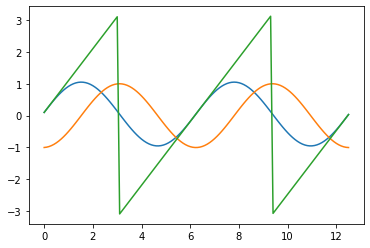

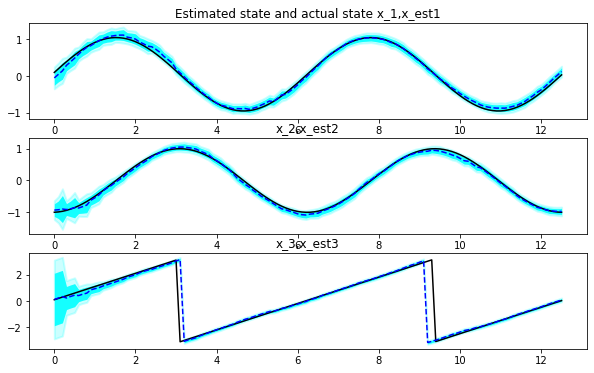

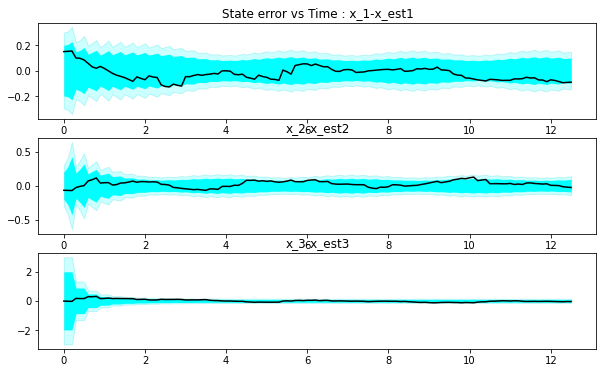

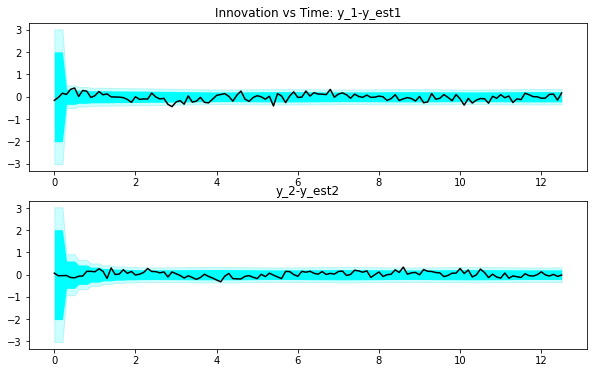

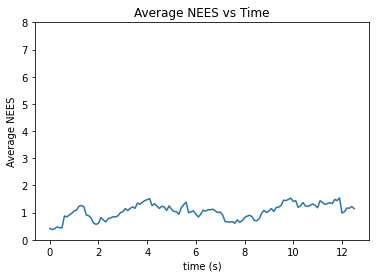

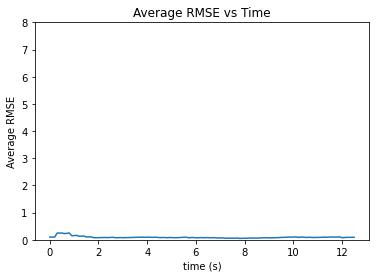

In [ ]:
#@title Monte carlo runs of the 2D Robot using AutoDiff and jit
# 2D robot simulation
# minimal code example
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import matplotlib.animation as animation
from matplotlib import rc
import matplotlib as mpl
import matplotlib.transforms as transforms

rc('animation', html='jshtml')


from time import sleep
from numpy import random
from decimal import Decimal # to make modulo work






def animate_2Dbot(X,U,T,param,robot_scale,frame_num,speedup):
  robot_scale =0.5;
  dt=param[0]
  fig = plt.figure()
  ax = fig.add_subplot(aspect='equal')
  ax.set_xlim(-2.2, 2.2)
  ax.set_ylim(-2.2, 2.2)
  triangle = ax.add_patch(plt.Polygon(np.array([[-0.4,0.3],[-0.4,-0.3],[0.4,-0.01],[1.2,0],[0.4,0.01]])*robot_scale, True))
  line, = ax.plot([0, 0,3], [0, -1,5], lw=1, c='c', alpha=0.5) # draw a line
  line.set_data([0],[0])
  transform = mpl.transforms.Affine2D().rotate_deg(-45) + mpl.transforms.Affine2D().translate(-5,-5)
  triangle.set_transform(transform+ax.transData)

  # determine skip amount from number of frames
  #frame_num =300
  #speedup =2
  tail = 15
  skip = np.floor(len(X)/frame_num)
  if skip < 1:
    skip=1
    frame_num = len(X)
  skip=int(skip)

  def animate(i):
    #print(i)
    transform = mpl.transforms.Affine2D().rotate(X[skip*i][2]) + mpl.transforms.Affine2D().translate(X[skip*i][0],X[skip*i][1])
    triangle.set_transform(transform+ax.transData)
    if i>1:
      if i>tail:
        Xtemp= np.array(X[i-tail:i])
        line.set_data(Xtemp[:,0],Xtemp[:,1])
      else:
        Xtemp= np.array(X[0:i])
        line.set_data(Xtemp[:,0],Xtemp[:,1])

  ani = animation.FuncAnimation(fig, animate, frames=frame_num, repeat=True, interval=int(dt*1000*skip/speedup)) # interval determines speed in ms
  print("Number of frames :",frame_num)
  plt.close()
  return ani

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)
# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)
mc_runs =10 #@param {type:"slider", min:1, max:50, step:1}

NEES = []; RMSE = [];
for mc in range(mc_runs):
  # 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
  dt = 0.1
  p0= np.array([0.,-1.])
  theta0= 0.0 # Initial angular displacement (rad) in quaternion
  t_end = 12.6; # 2 times period
  sig_n_x=0.1; sig_n_y=0.1;
  sig_n_v=0.1; sig_n_omg=0.1;
  X = []; T= []; U =[]; Y=[]; E=[]; X_est=[];P_est=[];S_est=[];Y_est=[];# Variables for data acquisition

  # these vectors are needed to define a system model
  x = np.block([p0,theta0]) # state vector - variables
  x_est = np.array([0.,-1.,0.]) # state vector - variables
  y = np.array([0,.0,])
  Pk = np.eye(x_est.shape[0])
  QN =np.diag([sig_n_v**2, sig_n_omg**2]);
  RN =np.diag([sig_n_x**2, sig_n_y**2]);
  param = {}  #we keep all parameters in a dictionary for ease of access
  param['dt']= dt  # the parameter vector - constants
  param['QN']= QN; param['RN']= RN;

  #2 . simulation -
  for t in np.arange(0,t_end,dt):
    #INPUTS
    u = np.array([1,1])

    # SYSTEM SIMULATION
    w = np.zeros(QN.shape[0])
    x = sys_model_2Dbot_jit(x,u,w,param)
    u = u + np.sqrt(QN) @ np.random.randn(QN.shape[0])

    # MEASUREMENT SIMULATION
    nu = np.sqrt(RN) @ np.random.randn(RN.shape[0])
    y = meas_model_2Dbot_jit(x,nu,param)

    # KALMAN PREDICTION
    x_est, Pk = predict_ekf_autodiff(x_est,Pk,u,param,sys_model_2Dbot_jit,jacfwd_sys_2Dbot_jit)

    # KALMAN CORRECTION
    if (Decimal(str(t)) % Decimal(str(0.3)))<Decimal(dt*0.01)  : # update rate
          x_est, Pk, y_est, Sk = correct_ekf_autodiff(x_est,Pk,y,param,meas_model_2Dbot_jit,jacfwd_meas_2Dbot_jit)

    # PERFORMANCE CALCULATION
    e = x - x_est
    Rot = SO3.from_rpy_radians(0.,0.,x[2])
    Rot_est = SO3.from_rpy_radians(0.,0.,x_est[2])
    Rot_err = Rot_est.inverse() @ Rot
    e = e.at[2].set(Rot_err.compute_yaw_radians())

    # DATA ACQUISITION
    X.append(x)
    X_est.append(x_est)
    T.append(t)
    Y.append(y)
    Y_est.append(y_est)
    U.append(u)
    E.append(e)
    P_est.append(Pk)
    S_est.append(Sk)
    NEES.append(1/e.shape[0]*e.T @ np.linalg.inv(Pk) @ e)
    RMSE.append(np.linalg.norm(e))

  # List to array conversion
  P_est = np.array(P_est)
  X_est = np.array(X_est)
  X = np.array(X)
  Y = np.array(Y)
  E = np.array(E)
  S_est = np.array(S_est)
  Y_est = np.array(Y_est)

  if mc == 0:
      print('run: ',mc, end ='.')
  else:
      print(mc, end ='.')


#storing for monte carlo
NEES = np.array(NEES)
NEES=NEES.reshape(mc+1,int(NEES.shape[0]/(mc+1)))
avgNEES = NEES.mean(0)

RMSE = np.array(RMSE)
RMSE=RMSE.reshape(mc+1,int(RMSE.shape[0]/(mc+1)))
avgRMSE = RMSE.mean(0)

print('NEES : ', avgNEES.mean(0))


print('RMSE : ', avgRMSE.mean(0))

# 4. visualization functions
fig1 = plt.figure()
p = plt.plot(T, X)

fig, axs = plt.subplots(X.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(X.shape[1]):
  #axs[i].plot(T,X_est[:,i]+2*np.sqrt(P_est[:,i,i]),'b')
  axs[i].plot(T,X[:,i],color='black')
  axs[i].plot(T,X_est[:,i],'b--')
  #axs[i].plot(T,X_est[:,i]-2*np.sqrt(P_est[:,i,i]),color='blue')
  if i==0:
    axs[i].set_title('Estimated state and actual state x_'+ str(1+i) + ',x_est'+ str(1+i))
  else:
    axs[i].set_title('x_'+ str(1+i) + ',x_est'+ str(1+i))
  axs[i].fill_between(T, X_est[:,i]-2*np.sqrt(P_est[:,i,i]),X_est[:,i]+2*np.sqrt(P_est[:,i,i]) ,
    alpha=0.9, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, X_est[:,i]-3*np.sqrt(P_est[:,i,i]),X_est[:,i]+3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=2)

print('Estimated error state vs Time')
fig, axs = plt.subplots(E.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(E.shape[1]):
  #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].plot(T,E[:,i],color='black')
  #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
  axs[i].fill_between(T, -2*np.sqrt(P_est[:,i,i]),2*np.sqrt(P_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
  axs[i].fill_between(T, -3*np.sqrt(P_est[:,i,i]),3*np.sqrt(P_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
  if i==0:
    axs[i].set_title('State error vs Time : x_'+ str(1+i) + '-x_est'+ str(1+i))
  else:
    axs[i].set_title('x_'+ str(1+i) + '-x_est'+ str(1+i))


fig, axs = plt.subplots(Y.shape[1],1, figsize=(10, 6), facecolor='w', edgecolor='k')

for i in range(Y.shape[1]):
  if Y.shape[1] == 1:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs.fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs.fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    axs.set_title('Innovation vs Time:y_'+ str(1+i) + '-y_est'+ str(1+i))
  else:
    #axs[i].plot(T,3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].plot(T,Y[:,i]-Y_est[:,i],color='black')
    #axs[i].plot(T,-3*np.sqrt(P_est[:,i,i]),color='blue')
    axs[i].fill_between(T, -2*np.sqrt(S_est[:,i,i]),2*np.sqrt(S_est[:,i,i]) ,
    alpha=1., edgecolor='#00FFFF', facecolor='#00FFFF',
    linewidth=0)
    axs[i].fill_between(T, -3*np.sqrt(S_est[:,i,i]),3*np.sqrt(S_est[:,i,i]) ,
    alpha=0.2, edgecolor='#00CED1', facecolor='#00FFFF',
    linewidth=1)
    if i==0:
      axs[i].set_title('Innovation vs Time: y_'+ str(1+i) + '-y_est'+ str(1+i))
    else:
      axs[i].set_title('y_'+ str(1+i) + '-y_est'+ str(1+i))


fig1 = plt.figure()
p = plt.plot(T, avgNEES);
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average NEES')
plt.title('Average NEES vs Time');

fig1 = plt.figure()
p = plt.plot(T, avgRMSE)
plt.ylim(0, 8)
plt.xlabel('time (s)')
plt.ylabel('Average RMSE');
plt.title('Average RMSE vs Time');



# TODO by STUDNET: Plot the trajectory of the robot (p_x vs p_y)


#anim = animate_2Dbot(X,U,T,param,0.5,300,4) # this is a custom visualization
#anim

Here we were dealing with the case where the error state is linear ($\tilde{x} = x - \hat{x}$) but this is not necessarily the case when we deal with groups (things like Rotation matrices, quaternions) ($\tilde{q} \neq q - \hat{q} ∉ \mathbb{SO(3)}$). Next Notebook will show the implementation of EKF using nonlinear error states which supports 3D problems where there are Rotation matrices.

# References


Farrell J.A., ``Aided Navigation: GPS with High Rate Sensors," McGraw-Hill Education, 2008.


Barfoot T.D., ``State Estimation for Robotics," Cambridge University Press, 2018.


Kalman RE, Bucy RS. ``New Results in Linear Filtering and Prediction Theory," ASME. J. Basic Eng. 1961;83(1):95-108.


  L.~A.~McGee and S.~F.~Schmidt,``Discovery of the Kalman filter as a practical tool for aerospace and industry,'' NASA-TM-86847, N86-13311.

